# Analyse Exploratoire des données du COVID-19

Exercice d'analyse exploratoire des données du COVID19 avec quelques packages et librairies Python.  Merci à l'Université Johns Hopkins pour les données. Ceci est un exercice et ne représente en aucun cas un avis d'expert épidémiologiste sur la pandémie du coronavirus. 

## Importation des données

Import des packages depuis SciPy stack et des données via ce [repos](https://github.com/CSSEGISandData/COVID-19).

In [3]:
#Import des packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pour le style & et les figures en ligne
sns.set()
%matplotlib inline

In [4]:
#Urls des données
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_cases_data_url = base_url + 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = base_url + 'time_series_covid19_deaths_global.csv'
recovery_cases_data_url = base_url+ 'time_series_covid19_recovered_global.csv'
# Import des jeux de données en tant que dataframe pandas 
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_recovered = pd.read_csv(recovery_cases_data_url)

## Cas confirmés de COVID-19

Exploration des données des cas confirmés:

In [5]:
raw_data_confirmed.head(n=5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,174,237,273,281,299,349,367,423,444,484
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,243,259,277,304,333,361,377,383,400,409
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,716,847,986,1171,1251,1320,1423,1468,1572,1666
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,376,390,428,439,466,501,525,545,564,583
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,8,8,8,10,14,16,17,19,19


**Remarque:** Pour plus d'informations sur les données: `.info()` et `.describe()`:

In [6]:
raw_data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  263 non-null    object 
 2   Lat             263 non-null    float64
 3   Long            263 non-null    float64
 4   1/22/20         263 non-null    int64  
 5   1/23/20         263 non-null    int64  
 6   1/24/20         263 non-null    int64  
 7   1/25/20         263 non-null    int64  
 8   1/26/20         263 non-null    int64  
 9   1/27/20         263 non-null    int64  
 10  1/28/20         263 non-null    int64  
 11  1/29/20         263 non-null    int64  
 12  1/30/20         263 non-null    int64  
 13  1/31/20         263 non-null    int64  
 14  2/1/20          263 non-null    int64  
 15  2/2/20          263 non-null    int64  
 16  2/3/20          263 non-null    int64  
 17  2/4/20          263 non-null    int

In [7]:
raw_data_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,...,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,21.339244,22.068133,2.110266,2.486692,3.577947,5.452471,8.053232,11.129278,21.209125,23.444867,...,3260.406844,3546.026616,3853.482890,4166.984791,4552.882129,4836.939163,5114.452471,5422.418251,5745.642586,6065.969582
std,24.779585,70.785949,27.434015,27.532888,34.275498,47.702207,66.662110,89.815834,220.427512,221.769901,...,16274.718201,17892.269613,19747.178551,21707.026686,23984.073766,25717.561274,27517.452168,29418.401918,31466.358777,33481.088534
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.938500,-21.031300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,17.000000,19.500000,20.500000,21.000000,22.000000,24.000000,27.000000,29.500000,30.500000
50%,23.634500,20.168300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,143.000000,168.000000,176.000000,184.000000,195.000000,214.000000,226.000000,237.000000,248.000000,255.000000
75%,41.178850,79.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,715.000000,780.000000,881.000000,949.000000,983.500000,1020.000000,1068.500000,1135.500000,1193.500000,1235.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,188172.000000,213372.000000,243762.000000,275586.000000,308853.000000,337072.000000,366667.000000,396223.000000,429052.000000,461437.000000


**Remarque:** Description détaillée des données...

### Nombre de cas confirmés par pays

En examinant à nouveau l’entête (ou la queue) du jeu de données, on remarque que chaque ligne correspond aux données d'un état ou d'un pays donné:

In [116]:
raw_data_confirmed.tail(n=20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
243,NaN,Mali,17.570692,-3.996166,0,0,0,0,0,0,...,28,31,36,39,41,45,47,56,59,74
244,NaN,Saint Kitts and Nevis,17.357822,-62.782998,0,0,0,0,0,0,...,8,8,9,9,9,10,10,11,11,11
245,Northwest Territories,Canada,64.825500,-124.845700,0,0,0,0,0,0,...,1,2,2,2,4,4,5,5,5,5
246,Yukon,Canada,64.282300,-135.000000,0,0,0,0,0,0,...,5,5,6,6,6,6,6,7,7,7
247,NaN,Kosovo,42.602636,20.902977,0,0,0,0,0,0,...,112,125,125,126,135,145,145,170,184,184
248,NaN,Burma,21.916200,95.956000,0,0,0,0,0,0,...,15,15,20,20,21,21,22,22,22,23
249,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,2,2,3,3,3,3,3,3,3,3
250,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
251,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,5,6,5,5,5,5,8,8,8,8
252,NaN,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,...,2,9,9,9,9,9,9,9,9,9


Je veux les chiffres par pays. Pour cela, je considère toutes les lignes (régions / provinces) qui correspondent à ce pays et additionne les chiffres pour chacun. C'est à dire faire du group by (grouper par colonne de pays) et additionner toutes les valeurs des autres colonnes.

Pour plus d'info sur cette méthode, voir [lien](https://www.jstatsoft.org/article/view/v040i01).

Cette méthode aussi appelée, la méthode Split-Apply-Combine, consiste à: 
    1- Répartir les données en nouveaux sous ensembles de données pour chaque pays,
    2- Appliquer la fonction «somme» pour chaque nouvel ensemble de données 
    3- Combinez par la suite ces jeux de données dans un nouveau dataframe.
    


La méthode group by qui permet cela est disponible dans l'API de Pandas

In [8]:
# Groupe par region (Pas besoin de la 'Lat', et 'Long' car elles ne sont pas intéressantes pour cette addition)
confirmed_country =  raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
confirmed_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,174,237,273,281,299,349,367,423,444,484
Albania,0,0,0,0,0,0,0,0,0,0,...,243,259,277,304,333,361,377,383,400,409
Algeria,0,0,0,0,0,0,0,0,0,0,...,716,847,986,1171,1251,1320,1423,1468,1572,1666
Andorra,0,0,0,0,0,0,0,0,0,0,...,376,390,428,439,466,501,525,545,564,583
Angola,0,0,0,0,0,0,0,0,0,0,...,7,8,8,8,10,14,16,17,19,19


Ainsi, chaque ligne de notre nouvelle data frame confirmed_country est une série temporel  du nombre de cas confirmés pour chaque pays. Maintenant, une data frame a un objet associé appelé un index, qui est essentiellement un ensemble d'indentifiants uniques pour chaque ligne. 

In [9]:
confirmed_country.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Western Sahara',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=184)

Il est indexé par pays / région. L'indexation par date permettrait  de produire des visualisations souhaitées

In [10]:
confirmed_country = confirmed_country.transpose()
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


Je regarde l'index pour voir s'il se compose réellement de DateTimes:

In [120]:
confirmed_country.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20'],
      dtype='object')

dtype = 'object' de type string et non DateTimes. Il faut utiliser pandas pour produire un type DateTimeIndex 

In [11]:
# Définir l'index en tant objet de type DateTimeIndex 
datetime_index = pd.DatetimeIndex(confirmed_country.index)
confirmed_country.set_index(datetime_index, inplace=True)
# Vérification
confirmed_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      


Maintenant, j'ai un type DateTimeIndex et des pays pour les colonnes, je peux tracer la data frame pour visualiser la série temporelle du nombre de cas confirmés par pays. Comme il y a tellement de pays, je m'en choisi quelques uns: 


## Tracé du nombre de cas confirmés par pays

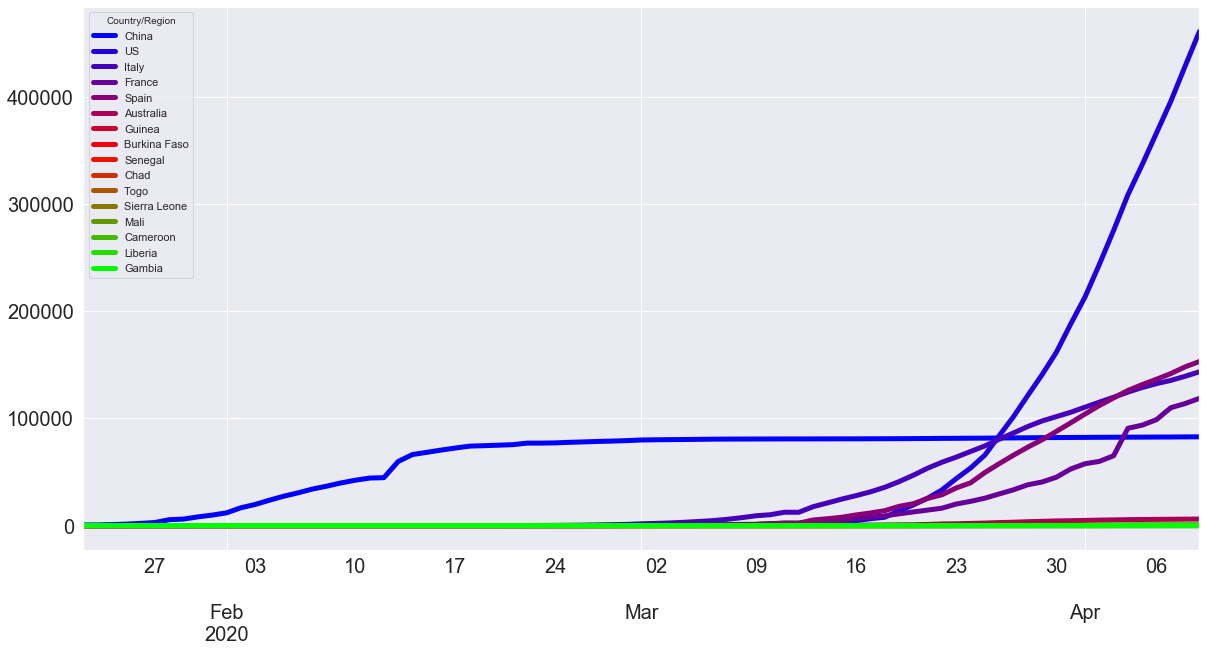

In [12]:
# Tracé de l'évolution temporelle du nombre de cas confirmés des pays choisis et assignés à la variable poi 
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Australia', 'Guinea', 'Burkina Faso', 'Senegal', 'Chad', 'Togo', 'Sierra Leone', 'Mali', 'Cameroon', 'Liberia', 'Gambia'  ]
confirmed_country[poi].plot(figsize=(20,10), linewidth=5, colormap='brg', fontsize=20);

Pour étiqueter mes axes et donner un titre à la figure, j'affine la line et j'ajoute des points pour les données afin que l'échantillonnage soit évident dans mes graphiques:

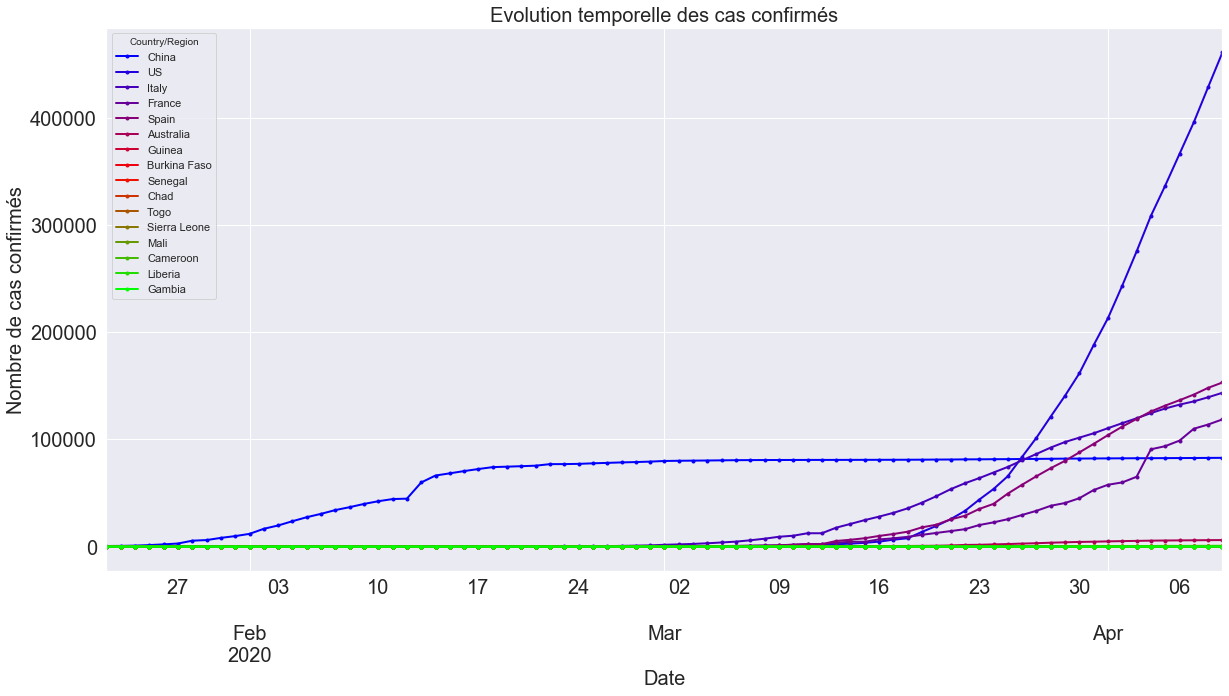

In [123]:
# Tracé temporel de mes pays d'intérêts 
confirmed_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Nombre de cas confirmés', fontsize=20);
plt.title('Evolution temporelle des cas confirmés', fontsize=20);

Même chose mais cette fois ci avec le log de l'axe des y:

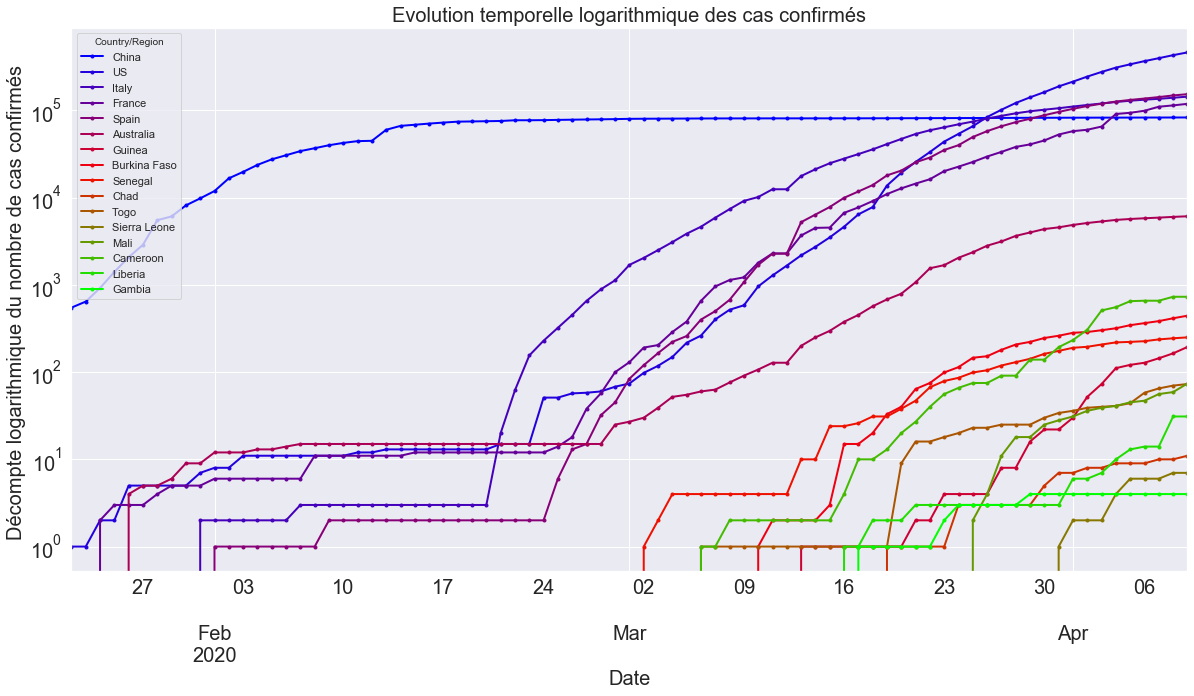

In [13]:
# Tracé de l'évolution temporelle de mes pays d'intérêts 
confirmed_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Décompte logarithmique du nombre de cas confirmés ', fontsize=20);
plt.title('Evolution temporelle logarithmique des cas confirmés', fontsize=20);

**Remarque:** Quel est l'intérêt de traçer de cette façon ? 
**Points clés:** 
- Si une variable prend des valeurs sur plusieurs ordres de grandeur (par exemple dans les 10s, 100s et 1000s), on utilise un axe logarithmique pour que les données ne soient pas toutes entassées dans une petite région de la visualisation..
- Si une courbe est approximativement linéaire sur un axe logarithmique, alors sa croissance est approximativement exponentielle et le gradient ou  pente de la droite nous renseignent sur l'exposant


## Nombre de décès

Comme le cas précédent, le raw_data_confirmed (cas confirmés), j'observe les informations de ma data frame sur le cas de mort (raw_data_deaths):

In [14]:
raw_data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  263 non-null    object 
 2   Lat             263 non-null    float64
 3   Long            263 non-null    float64
 4   1/22/20         263 non-null    int64  
 5   1/23/20         263 non-null    int64  
 6   1/24/20         263 non-null    int64  
 7   1/25/20         263 non-null    int64  
 8   1/26/20         263 non-null    int64  
 9   1/27/20         263 non-null    int64  
 10  1/28/20         263 non-null    int64  
 11  1/29/20         263 non-null    int64  
 12  1/30/20         263 non-null    int64  
 13  1/31/20         263 non-null    int64  
 14  2/1/20          263 non-null    int64  
 15  2/2/20          263 non-null    int64  
 16  2/3/20          263 non-null    int64  
 17  2/4/20          263 non-null    int

Il semble être structuré de la même manière que raw_data_confirmed. 

Pour rappel:
    - J'applique la méthode Split-Apply-Combined(en omettant la 'Lat'/'Long'),
    - Je fais les même transpositions
    - Puis j'index le type DateTime et 
    - Je le visualise de manière (linére et avec les semi-log)

## Nombre de décès par pays

In [18]:
# Méthode Split-Apply-Combine
deaths_country = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)

# Transposition
deaths_country = deaths_country.transpose()

# Placer l'index en tant que DateTime
datetime_index = pd.DatetimeIndex(deaths_country.index)
deaths_country.set_index(datetime_index, inplace=True)

# Vérification
deaths_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# index
deaths_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

### Tracé du nombre de décès rapporté par pays

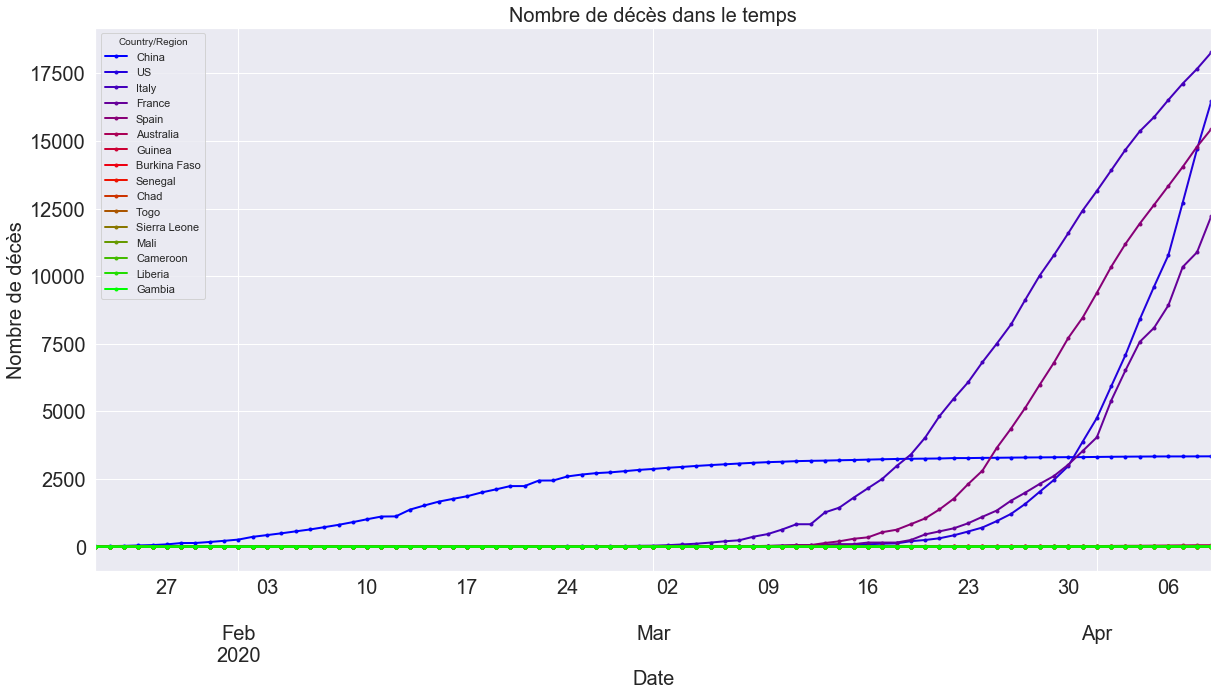

In [20]:
#Tracé des séries temporelles de mes pays d'intérêt
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Nombre de décès', fontsize=20);
plt.title('Nombre de décès dans le temps', fontsize=20);

tracé semi-logarithmique:

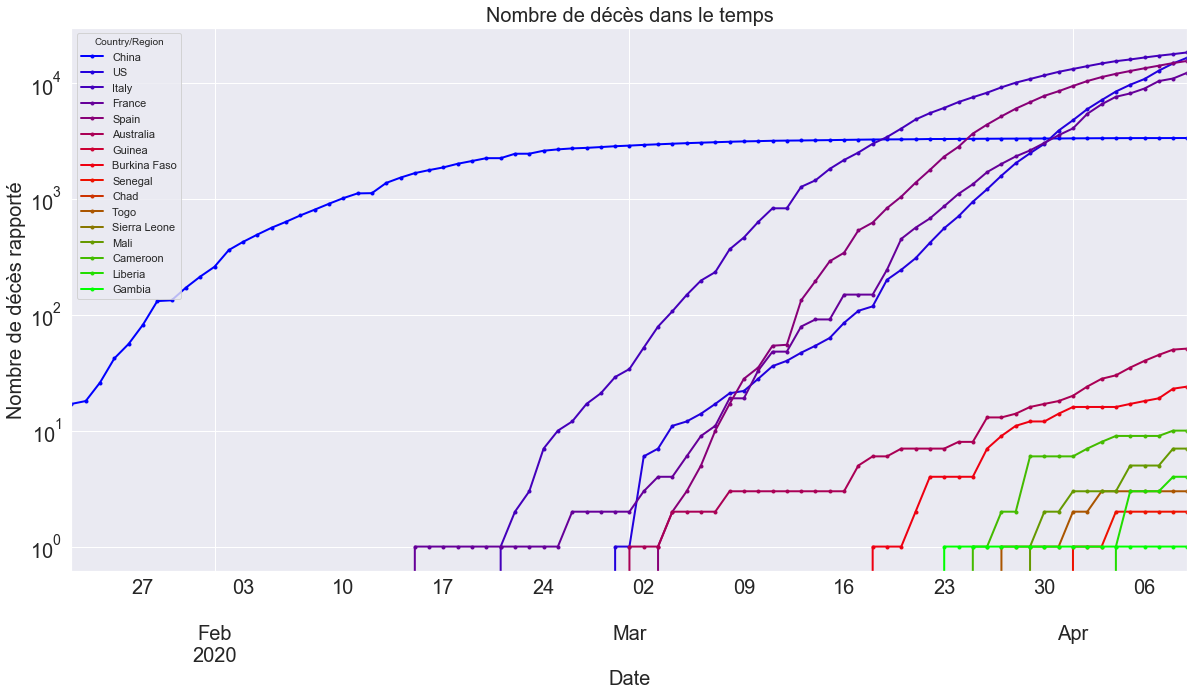

In [21]:
#Tracé des séries temporelles de mes pays d'intérêt
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, colormap='brg', logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Nombre de décès rapporté', fontsize=20);
plt.title('Nombre de décès dans le temps', fontsize=20);

### Courbes de croissance à partir du jour où le nombre de décès connus est ≥ 25

Pour comparer ce qui se passe dans différents pays, je peux aligner les courbes de croissance de chaque pays pour qu'elles commencent toutes le jour où le nombre de décès connus est ≥ 25, comme indiqué dans le premier graphique ici. Pour y parvenir, tout d'abord, je définis toutes les valeurs inférieures à 25 sur NaN afin que les points de données associés ne soient pas tracés du tout lorsque nous visualisons les données:

In [22]:
# On peut faire une boucle for sur les colonnes et définir des valeurs <25 à None
for col in deaths_country.columns:
    deaths_country.loc[(deaths_country[col] < 25),col] = None

# verification
deaths_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
2020-04-05,NaN,NaN,152.0,NaN,NaN,NaN,44.0,NaN,35.0,204.0,...,NaN,4943.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,NaN,NaN,173.0,NaN,NaN,NaN,48.0,NaN,40.0,220.0,...,NaN,5385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,NaN,NaN,193.0,NaN,NaN,NaN,56.0,NaN,45.0,243.0,...,NaN,6171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-08,NaN,NaN,205.0,NaN,NaN,NaN,63.0,NaN,50.0,273.0,...,NaN,7111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-09,NaN,NaN,235.0,25.0,NaN,NaN,72.0,NaN,51.0,295.0,...,NaN,7993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Maintenant, je trace comme le cas précédent pour nous m'assurer de voir ce que je souhaite voir:

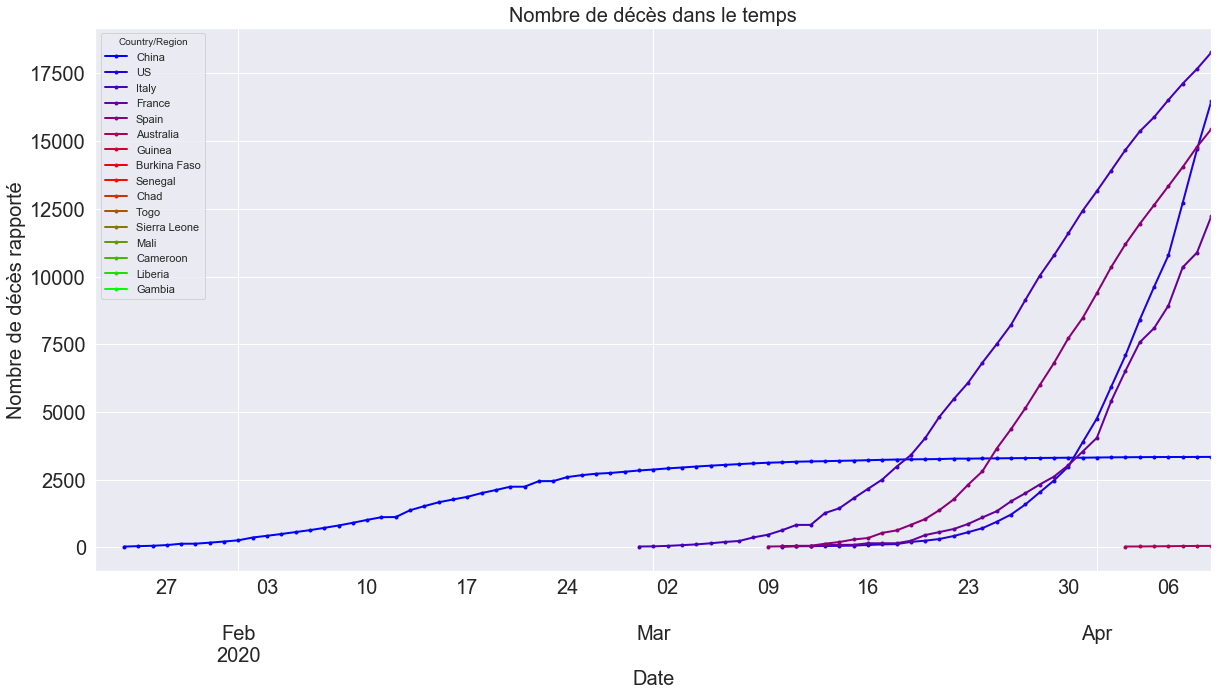

In [131]:
#Tracé des séries temporelles de mes pays d'intérêt
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Australia', 'Guinea', 'Burkina Faso', 'Senegal', 'Chad', 'Togo', 'Sierra Leone', 'Mali', 'Cameroon', 'Liberia', 'Gambia']
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Nombre de décès rapporté', fontsize=20);
plt.title('Nombre de décès dans le temps', fontsize=20);

Les pays qui ont connu moins de 25 décès au total auront des colonnes en NaN, alors je les abandonne et je compte le nombre de colonnes qui me reste:

In [23]:
# Abandons des colonnes NaNs (des pays n'ayant pas atteint 25 morts)
deaths_country.dropna(axis=1, how='all', inplace=True)
deaths_country.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79 entries, 2020-01-22 to 2020-04-09
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Algeria                 15 non-null     float64
 1   Andorra                 1 non-null      float64
 2   Argentina               10 non-null     float64
 3   Australia               7 non-null      float64
 4   Austria                 17 non-null     float64
 5   Belgium                 21 non-null     float64
 6   Bosnia and Herzegovina  4 non-null      float64
 7   Brazil                  19 non-null     float64
 8   Canada                  18 non-null     float64
 9   Chile                   6 non-null      float64
 10  China                   77 non-null     float64
 11  Colombia                7 non-null      float64
 12  Czechia                 10 non-null     float64
 13  Denmark                 17 non-null     float64
 14  Dominican Republic      

Plus besoin du type DateTimeIndex car les pays sont tracés en fonction du jour où ils ont fait au moins 25 morts. 

Ainsi, je peux:
- Réinitialiser l'index, qui me donnera un index ordinal (qui transforme la date en une colonne régulière) et
- Supprimer la colonne date (qui sera appelée «index») après la réinitialisation.

In [24]:
# Trie d'index, abandonne de la colonne date 
deaths_country_drop = deaths_country.reset_index().drop(['index'], axis=1)
deaths_country_drop.head()

Country/Region,Algeria,Andorra,Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Brazil,Canada,Chile,...,Slovenia,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,US,Ukraine,United Kingdom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il est maintenant temps de décaler chaque colonne afin que la première entrée soit la première valeur NaN qu'elle contient! Pour ce faire, j'utilise la méthode shift() sur chaque colonne.  

In [25]:
# méthode shift
for col in deaths_country_drop.columns:
    deaths_country_drop[col] = deaths_country_drop[col].shift(-deaths_country_drop[col].first_valid_index())
# entête
deaths_country_drop.head()

Country/Region,Algeria,Andorra,Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Brazil,Canada,Chile,...,Slovenia,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,US,Ukraine,United Kingdom
0,25.0,25.0,27.0,28.0,28.0,37.0,29.0,25.0,25.0,27.0,...,28.0,28.0,25.0,27.0,26.0,25.0,30.0,28.0,27.0,56.0
1,26.0,NaN,28.0,30.0,30.0,67.0,33.0,34.0,26.0,34.0,...,30.0,35.0,36.0,28.0,27.0,NaN,37.0,36.0,32.0,56.0
2,29.0,NaN,36.0,35.0,49.0,75.0,34.0,46.0,30.0,37.0,...,36.0,54.0,62.0,41.0,30.0,NaN,44.0,40.0,37.0,72.0
3,31.0,NaN,39.0,40.0,58.0,88.0,35.0,59.0,38.0,43.0,...,40.0,55.0,77.0,54.0,32.0,NaN,59.0,47.0,38.0,138.0
4,35.0,NaN,43.0,45.0,68.0,122.0,NaN,77.0,54.0,48.0,...,43.0,133.0,105.0,75.0,NaN,NaN,75.0,54.0,45.0,178.0


**NB:** au lieu de boucler sur les colonnes, je pourrais appliquer une fonction lambda aux colonnes de la dataframe directement:

In [26]:
# méthode shift avec la fonction lambda 
#deaths_country = deaths_country.apply(lambda x: x.shift(-x.first_valid_index()))

Tracés linéair et semi-logarithmique:

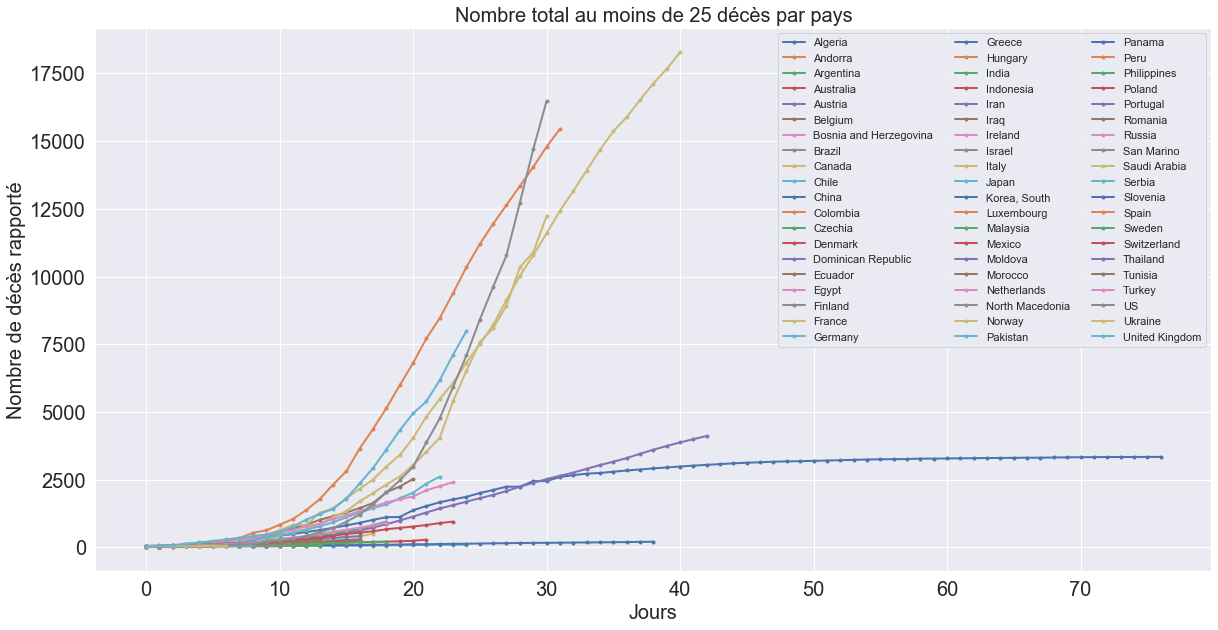

In [27]:
# Tracé des séries chronologiques
ax = deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Jours', fontsize=20);
plt.ylabel('Nombre de décès rapporté', fontsize=20);
plt.title('Nombre total au moins de 25 décès par pays', fontsize=20);

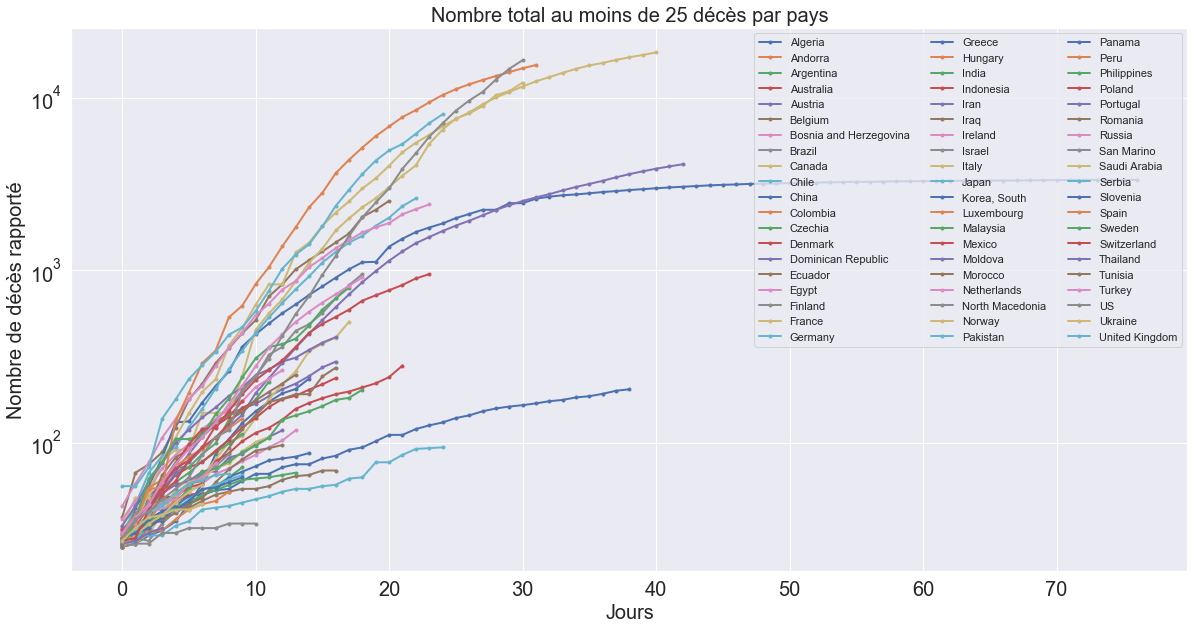

In [137]:
# Tracé semi log  des séries chronologiques
ax = deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Jours', fontsize=20);
plt.ylabel('Nombre de décès rapporté', fontsize=20);
plt.title('Nombre total au moins de 25 décès par pays', fontsize=20);

**Note:** Les tracés ci-dessus sont difficiles à analyser à partir des informations fournies. Trop de courbes de croissance  **et**  trop de couleurs se ressemblent donc il est difficile de situé les pays. Ci-dessous, je retrace avec moins de courbes et plus loin dans le cahier, j'utiliserai Altair pour introduire l'interactivité dans mes tracés afin de relever pour palier à ça.

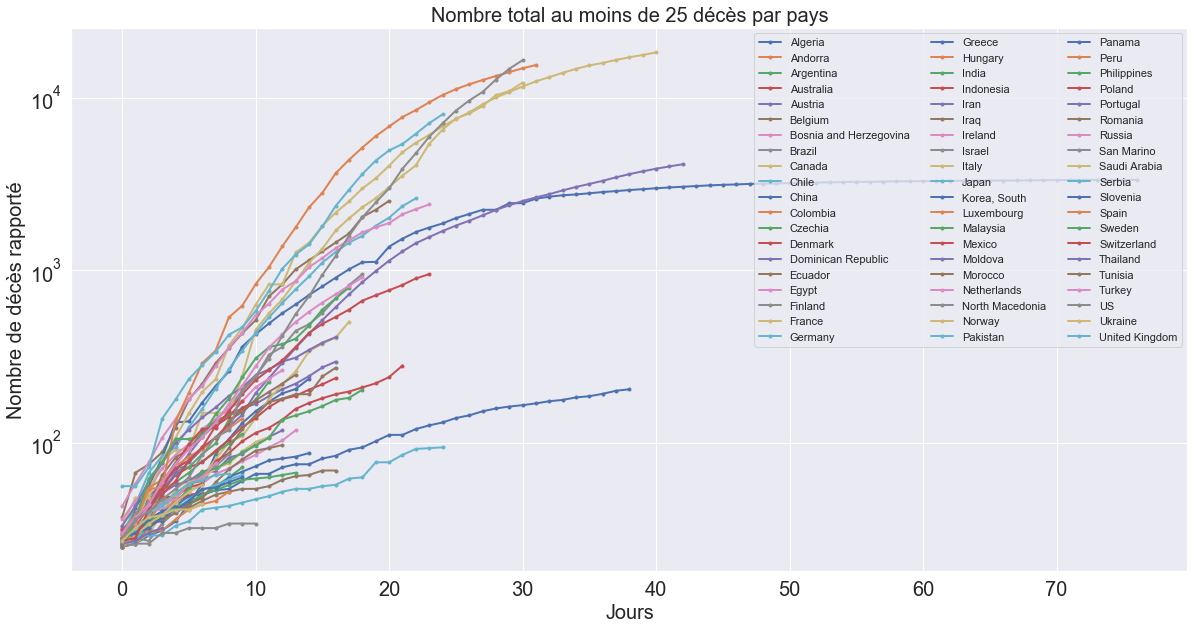

In [138]:
# Tracé semi log  des séries chronologiques
ax = deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Jours', fontsize=20);
plt.ylabel('Nombre de décès rapporté', fontsize=20);
plt.title('Nombre total au moins de 25 décès par pays', fontsize=20);

### Tracé du nombre de personnes rétablies

Le troisième jeu de données dans le référentiel Hopkins est le nombre de persones rétablies. Pareillement aux deux premières analyses, j'applique les mêmes procédures d'analyse. A la différence de ces deux dernières, j'applique au lieu de toujours répeter les mêmes. 

In [28]:
# Fonction de regroupement des pays par région
def group_by_country(raw_data):
    """Renvoie des données pour les pays indexés par date"""
    # Grouper par 
    data = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    # Transposition
    data = data.transpose()
    # définition de l'index en tant que DateTimeIndex
    datetime_index = pd.DatetimeIndex(data.index)
    data.set_index(datetime_index, inplace=True)
    return data

In [30]:
# Fonction d'alignement des courbes de croissance
def align_curves(data, min_val):
    """Alignement des courbes de croissance à partir du jour où le nombre de décès connus = min_val"""
    # La boucle for sur les colonnes & définirition des valeurs < min_val à None
    for col in data.columns:
        data.loc[(data[col] < min_val),col] = None
    # Abandon des colonnes avec des NaNs
    data.dropna(axis=1, how='all', inplace=True)
    # rédérinir lindex, abandon de la date
    data = data.reset_index().drop(['index'], axis=1)
    # la fonction Shift pour chacune des colonnes 
    for col in data.columns:
        data[col] = data[col].shift(-data[col].first_valid_index())
    return data

In [31]:
# Fonction pour tracer des séries chronologiques
def plot_time_series(df, plot_title, x_label, y_label, logy=False):
    """Tracé des séries chronologiques """
    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=logy)
    ax.legend(ncol=3, loc='lower right')
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

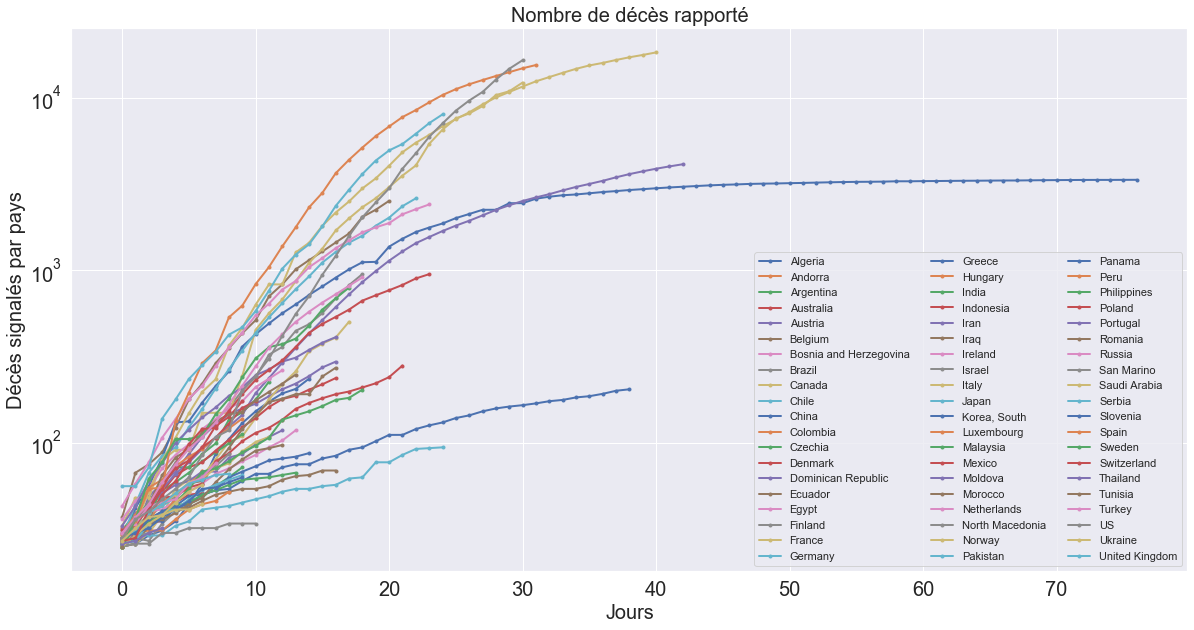

In [142]:
deaths_country_drop = group_by_country(raw_data_deaths)
deaths_country_drop = align_curves(deaths_country_drop, min_val=25)
plot_time_series(deaths_country_drop, 'Nombre de décès rapporté', 'Jours', 'Décès signalés par pays', logy=True)

In [32]:
recovered_country = group_by_country(raw_data_recovered)
recovered_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
2020-04-05,15,104,90,26,2,0,280,57,757,2998,...,144,229,93,30,52,90,25,0,3,0
2020-04-06,18,116,90,31,2,0,325,62,1080,3463,...,167,287,104,30,65,95,24,0,5,0
2020-04-07,18,131,113,39,2,0,338,87,1080,4046,...,186,325,150,30,65,123,42,0,7,0
2020-04-08,29,154,237,52,2,0,358,114,1080,4512,...,239,345,150,30,65,126,44,0,7,0
2020-04-09,32,165,347,58,2,0,365,138,1472,5240,...,268,359,192,38,84,128,44,0,24,0


In [33]:
recovered_country_drop = align_curves(recovered_country, min_val=25)
recovered_country_drop.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza
0,29.0,31.0,32.0,26.0,52.0,28.0,26.0,112.0,26.0,35.0,...,26.0,105.0,25.0,26.0,53.0,41.0,25.0,31.0,25.0,25.0
1,32.0,31.0,32.0,31.0,52.0,30.0,26.0,225.0,26.0,35.0,...,26.0,121.0,28.0,31.0,67.0,41.0,25.0,39.0,55.0,NaN
2,NaN,33.0,32.0,39.0,63.0,30.0,26.0,225.0,26.0,44.0,...,42.0,147.0,28.0,31.0,67.0,62.0,25.0,39.0,58.0,42.0
3,NaN,44.0,65.0,52.0,72.0,30.0,88.0,479.0,26.0,44.0,...,70.0,176.0,28.0,38.0,67.0,68.0,30.0,39.0,63.0,44.0
4,NaN,52.0,65.0,58.0,72.0,30.0,88.0,636.0,32.0,60.0,...,105.0,178.0,35.0,38.0,67.0,93.0,30.0,39.0,75.0,44.0


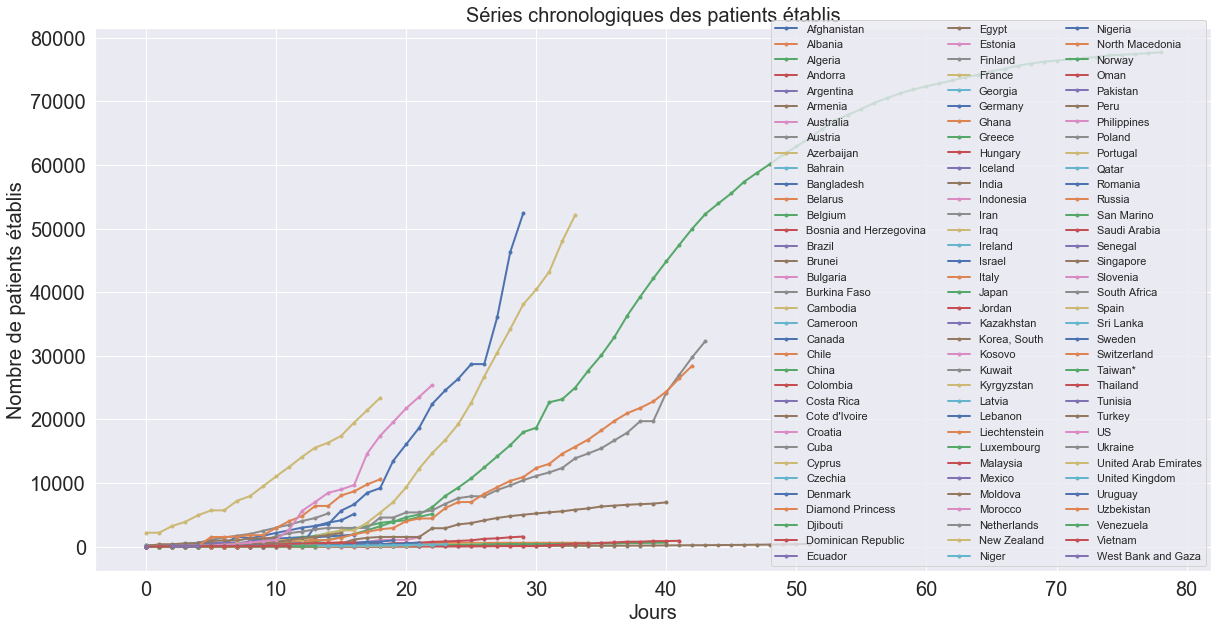

In [145]:
plot_time_series(recovered_country_drop, 'Séries chronologiques des patients établis', 'Jours', 'Nombre de patients établis')

**Remarque:** encore une fois, les graphiques ci-dessus sont difficiles à analyser, difficile d'en tirer  des informations significatives. Il y a trop de courbes de croissance de sorte qu'il est très encombrant **et** trop de couleurs se ressemblent. Il est donc difficile de dire quel pays appartient à la légende.

In [34]:
#plot_time_series(recovered_country_drop, 'Séries chronologiques des patients établis', 'Jours', 'Nombre de patients établis', True)

## Interaction avec Altair

Ici, je visualise mes données de manière interactive avec ALtair. Comme celles que m'inspire [NYTimes](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html), un graphique du nombre confirmé de décès par pays pour les endroits avec au moins de 25 décès, similaire au mien ci-dessus, mais avec des outils de survol informatifs, [This one](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html) .

In [35]:
# Entête
deaths_country_drop.head()

Country/Region,Algeria,Andorra,Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Brazil,Canada,Chile,...,Slovenia,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,US,Ukraine,United Kingdom
0,25.0,25.0,27.0,28.0,28.0,37.0,29.0,25.0,25.0,27.0,...,28.0,28.0,25.0,27.0,26.0,25.0,30.0,28.0,27.0,56.0
1,26.0,NaN,28.0,30.0,30.0,67.0,33.0,34.0,26.0,34.0,...,30.0,35.0,36.0,28.0,27.0,NaN,37.0,36.0,32.0,56.0
2,29.0,NaN,36.0,35.0,49.0,75.0,34.0,46.0,30.0,37.0,...,36.0,54.0,62.0,41.0,30.0,NaN,44.0,40.0,37.0,72.0
3,31.0,NaN,39.0,40.0,58.0,88.0,35.0,59.0,38.0,43.0,...,40.0,55.0,77.0,54.0,32.0,NaN,59.0,47.0,38.0,138.0
4,35.0,NaN,43.0,45.0,68.0,122.0,NaN,77.0,54.0,48.0,...,43.0,133.0,105.0,75.0,NaN,NaN,75.0,54.0,45.0,178.0


Pour Altair, je souhaite convertir les données au **format de données long**. Cela va donner une ligne pour chaque paire pays / jour, donc mes colonnes seront "Jour", "Pays" et nombre de "Décès". Je le fais en utilisant la méthode dataframe `.melt()` comme suit:

In [36]:
# création du format de données long pour le décès
deaths_long = deaths_country_drop.reset_index().melt(id_vars='index', value_name='Deaths').rename(columns={'index':'Day'})
deaths_long.head()

,Day,Country/Region,Deaths
0,0,Algeria,25.0
1,1,Algeria,26.0
2,2,Algeria,29.0
3,3,Algeria,31.0
4,4,Algeria,35.0


De telles transformations ont été effectuées depuis longtemps, mais ce n'est qu'en 2014 que Hadley Wickham a officialisé le langage dans son article. [Tidy Data](https://www.researchgate.net/publication/215990669_Tidy_data). D'autre par contre le trouve imprecis, c'est le cas de Wickham qui préfère éviter les termes longs et larges.


In [37]:
import altair as alt
alt.renderers.enable('default')

# altair plot 
alt.Chart(deaths_long).mark_line().encode(
    x='Day',
    y='Deaths',
    color='Country/Region')

alt.Chart(...)

Il est agréable de construire un graphique aussi informatif et élégant en quatre lignes de code. Une colonne pour chaque variable m'a permis de faire faire explicitement à Altair ce que je voulais voir sur chaque axe ainsi que la couleur de préférence.

Info [documentation Altair](https://altair-viz.github.io/getting_started/overview.html),

> L'idée principale consiste à déclarez des liens entre * colonnes de données * et * canaux d'encodage visuel *, tels que l'axe x, l'axe y, la couleur, etc. Le reste des détails du tracé est géré automatiquement. 


Personnalisation du code pour épaissir la largeur de la ligne, modifier l'opacité et agrandir le graphique: 

In [38]:
# altair plot 
alt.renderers.enable('default')

alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x='Day',
    y='Deaths',
    color='Country/Region'
).properties(
    width=800,
    height=650
)

alt.Chart(...)

Je peux également ajouter un axe logarithmique en utilisant la forme longue `alt.X('Day',...)` comme décrit dans la doc. [documentation Altair](https://altair-viz.github.io/user_guide/encoding.html)
> C’est toujours utile  quand on veut  effectuez des ajustements plus précis de l'encodage, tels que les propriétés de regroupement, d'axe et d'échelle, ou plus.
Je peux aussi ajouter les info-bulle de survol afin que, lorsque l'on survolera un pointeur sur n'importe quel point de l'une des lignes, il nous indique le «pays», le «jour» et le nombre de «décès».


In [39]:
# Tracé altair  
alt.renderers.enable('default')

alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)


alt.Chart(...)

C'est génial de pouvoir ajouter cette info-bulle utile avec une ligne de code `tooltip=['Country/Region', 'Day','Deaths']`.
Un aspect intéressant du graphique du NYTimes est que, lorsque l’on  survole une courbe particulière, elle se démarquait de l'autre. je souhaite faire quelque chose de similaire ici: dans le graphique résultant, lorsque l'on clique sur une courbe, les autres deviennent gris.

**Note:** Lors de la première tentative de construction de ce graphique, j'ai découvert [ici](https://github.com/altair-viz/altair/issues/1552) que "plusieurs valeurs conditionnelles dans un seul codage ne sont pas autorisées par la spécification Vega-Lite", ce que Altair utilise. 


In [156]:
#  outils de Selection
selection = alt.selection_single(fields=['Country/Region'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))


# Base du plot altair  
alt.renderers.enable('default')

base = alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)

# Diagramme
chart = base.encode(
  color=alt.condition(selection, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
  selection
)

# Superposition
overlay = base.encode(
    color='Country/Region',
  opacity=alt.value(0.5),
  tooltip=['Country/Region:N', 'Name:N']
).transform_filter(
  selection
)

# ensemble
chart + overlay

alt.LayerChart(...)

Ce n'est pas facile d'aligner la légende avec les courbes du graphique, alors je mets les étiquettes sur le graphique lui-même. Merci à Jake Vanderplas pour cette suggestion et pour le code.

In [40]:
# pas de NaNs
deaths_long = deaths_long.dropna()

# Outils de Selection 
selection = alt.selection_single(fields=['Country/Region'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))


# Base du plot altair  
alt.renderers.enable('default')

base = alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color=alt.Color('Country/Region', legend=None),
).properties(
    width=800,
    height=650
)

# Diagramme
chart = base.encode(
  color=alt.condition(selection, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
  selection
)

# Superposition
overlay = base.encode(
  color='Country/Region',
  opacity=alt.value(0.5),
  tooltip=['Country/Region:N', 'Name:N']
).transform_filter(
  selection
)

#  éttiquetage 
text = base.mark_text(
    align='left',
    dx=5,
    size=10
).encode(
    x=alt.X('Day', aggregate='max',  axis=alt.Axis(title='Day')),
    y=alt.Y('Deaths', aggregate={'argmax': 'Day'}, axis=alt.Axis(title='Reported Deaths')),
    text='Country/Region',  
).transform_filter(
    selection
)

# ensemmble
chart + overlay + text

alt.LayerChart(...)